# Ex04 Regression

In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import numpy as np
%matplotlib inline

## 1. Preprocessing

In [82]:
data = pd.read_csv('../data/checker_regression.csv')
data = data.drop(columns='uid').fillna(0)
data

,num_commits,pageviews,AVG(diff)
0,62,28.0,0.00
1,62,28.0,0.00
2,62,28.0,0.00
3,62,28.0,0.00
4,62,28.0,0.00
...,...,...,...
72,128,0.0,-104.75
73,40,0.0,-175.60
74,15,0.0,-62.60
75,8,0.0,-115.50


In [83]:
X = data.drop(columns=['AVG(diff)'])
y = data['AVG(diff)']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =0.2, random_state=21)

## 2. Crossvalidation

In [26]:
def crossval(n_splits, X, y, model):
    # KFold кросс-валидация для регрессионных моделей
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=21)
    rmse_train = []
    rmse_test = []
    
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        model.fit(X_train, y_train)
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
        
        # RMSE - среднеквадратичная ошибка, насколько сильно предсказания отличаются от реальных значений
        train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
        test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
        
        rmse_train.append(train_rmse)
        rmse_test.append(test_rmse)
        
        print(f"train - {train_rmse} | test - {test_rmse}")
    
    avg_rmse = np.mean(rmse_test)
    print(f"Average RMSE on crossval is {avg_rmse}")

In [64]:
linear_model = LinearRegression(fit_intercept=True)
tree_model = DecisionTreeRegressor(random_state=21, max_depth = 10, min_samples_split=5, min_samples_leaf=4)
rf_model = RandomForestRegressor(random_state=21, n_estimators=100, max_depth=10, min_samples_split=5)

In [65]:
print("LinearRegression Crossval Results:")
crossval(10, X, y, linear_model)

LinearRegression Crossval Results:
train - 42.27291015233797 | test - 70.43979397280242
train - 47.45726648237968 | test - 30.657394014354043
train - 47.77854388604299 | test - 27.137319378269105
train - 46.2441901620785 | test - 44.123072052096376
train - 46.39355004742244 | test - 42.420391728163665
train - 47.71541914802497 | test - 28.273391654514054
train - 46.308918660456506 | test - 45.67313727400561
train - 47.81194647242181 | test - 20.57247658092342
train - 44.12915324532897 | test - 63.14957718941947
train - 42.350893141368886 | test - 74.15893330081012
Average RMSE on crossval is 44.66054871453583


In [66]:
print("DecisionTreeRegressor Crossval Results:")
crossval(10, X, y, tree_model)

DecisionTreeRegressor Crossval Results:
train - 23.012569444886342 | test - 64.59129117639105
train - 24.817866170970323 | test - 1.35676113640169
train - 24.821305812189298 | test - 0.0
train - 24.14138307578077 | test - 32.85689509913491
train - 26.26195534310747 | test - 34.4288644199444
train - 25.227958353337055 | test - 23.46921078509636
train - 25.2242529584741 | test - 23.634215923289553
train - 23.35128543672958 | test - 27.8418079930422
train - 17.629780684890967 | test - 68.3929372604994
train - 25.264461814057473 | test - 29.451299928191922
Average RMSE on crossval is 30.602328372199146


In [67]:
print("RandomForestRegressor Crossval Results:")
crossval(10, X, y, rf_model)

RandomForestRegressor Crossval Results:
train - 19.161649648870164 | test - 59.463404402881494
train - 21.66757047559546 | test - 7.28059461136608
train - 21.148871157243903 | test - 0.0
train - 21.26580559981422 | test - 29.40374091033062
train - 21.07382369409661 | test - 41.16199796070653
train - 21.275307376925888 | test - 32.38024821400191
train - 22.76763285276003 | test - 21.206704786085243
train - 20.56411400340683 | test - 30.719180807708653
train - 19.199982500404193 | test - 58.51130285069964
train - 20.178592758751563 | test - 41.31464934274565
Average RMSE on crossval is 32.14418238865258


## 3. Predictions and evaluation

### LinearRegression

In [68]:
linear_model.fit(X_train, y_train)
lin_pred = linear_model.predict(X_test)

Text(0, 0.5, 'predictions')

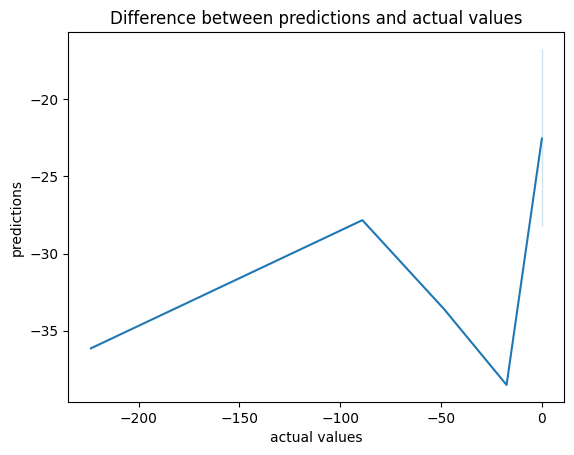

In [69]:
ax = sns.lineplot(x=y_test,y=lin_pred)
ax.set_title('Difference between predictions and actual values')
ax.set_xlabel('actual values')
ax.set_ylabel('predictions')

### DecisionTreeRegressor

In [70]:
tree_model.fit(X_train, y_train)
tree_pred = tree_model.predict(X_test)

Text(0, 0.5, 'predictions')

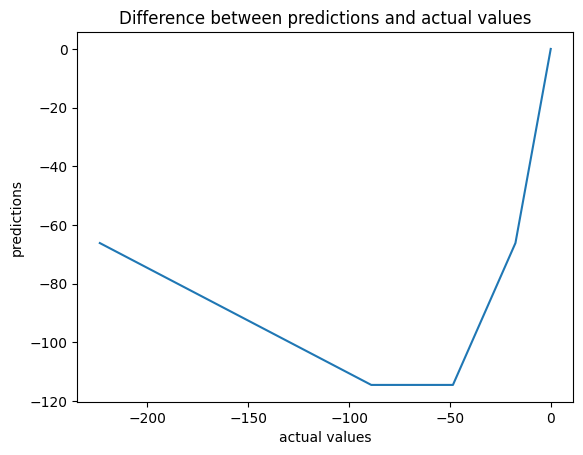

In [71]:
ax = sns.lineplot(x=y_test,y=tree_pred)
ax.set_title('Difference between predictions and actual values')
ax.set_xlabel('actual values')
ax.set_ylabel('predictions')

### RandomForestRegressor

In [72]:
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

Text(0, 0.5, 'predictions')

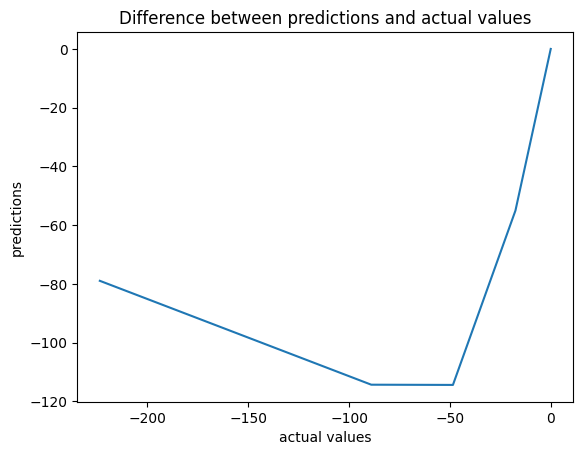

In [73]:
ax = sns.lineplot(x=y_test,y=rf_pred)
ax.set_title('Difference between predictions and actual values')
ax.set_xlabel('actual values')
ax.set_ylabel('predictions')

* How would plot look like in the ideal case? Put the answer to the markdown cell in the end of the section.

diagonal